In [1]:
import os, sys
import numpy as np
import pandas as pd
import scipy as sp
from datetime import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
from sklearn.model_selection import train_test_split

In [2]:
# define paths
main_root = "../../data/main/"
monitor_root = "../../data/csv/monitor"

In [3]:
# load coordinates
monitor_coords = pd.read_csv(os.path.join(monitor_root, "monitor_coords.csv"))

In [4]:
# train and test
monitors = [monitor for monitor in monitor_coords['id'].values if monitor.endswith('A')]
dates = [d.strftime('%Y-%m-%d') for d in pd.date_range(start="2015-01-01", end="2016-12-31")]

In [5]:
main = pd.concat([pd.read_csv(os.path.join(main_root, "main_" + str(year) + ".csv"))
                  for year in range(2005, 2017)], ignore_index=True)

In [6]:
main.set_index(['id', 'date'], inplace=True)

In [7]:
main.sort_index(inplace=True)

In [8]:
main = main.drop(['lat', 'long'], axis=1)

In [9]:
main.columns

Index(['AODANA', 'COSC', 'MODAOD', 'MODAOD_kernel', 'MYDAOD', 'MYDAOD_kernel',
       'NO2', 'NO2_kernel', 'Ozone', 'Ozone_kernel', 'PBLH', 'PS', 'RH', 'SO2',
       'SO2_kernel', 'T2M', 'TO3', 'U2M', 'V2M', 'target_API', 'target_AQI',
       'target_CO', 'target_NO2', 'target_O3', 'target_PM10', 'target_PM2.5',
       'target_SO2'],
      dtype='object')

In [10]:
for var in ['MODAOD_kernel', 'MYDAOD_kernel', 'NO2_kernel',
            'Ozone_kernel', 'SO2_kernel']:
    main[var + '_3day'] = main[var].rolling(3, center=True, min_periods=1).mean()
    main[var + '_7day'] = main[var].rolling(7, center=True, min_periods=1).mean()

In [11]:
main['doy'] = pd.to_datetime(main.index.get_level_values(1)).dayofyear

In [12]:
# calculate adjusted AOD
main = main.assign(MYDAOD_kernel_adj = main['MYDAOD_kernel'] * (1 - main['RH']) / main['PBLH'] * 100)
main = main.assign(MODAOD_kernel_adj = main['MODAOD_kernel'] * (1 - main['RH']) / main['PBLH'] * 100)

In [13]:
main.columns

Index(['AODANA', 'COSC', 'MODAOD', 'MODAOD_kernel', 'MYDAOD', 'MYDAOD_kernel',
       'NO2', 'NO2_kernel', 'Ozone', 'Ozone_kernel', 'PBLH', 'PS', 'RH', 'SO2',
       'SO2_kernel', 'T2M', 'TO3', 'U2M', 'V2M', 'target_API', 'target_AQI',
       'target_CO', 'target_NO2', 'target_O3', 'target_PM10', 'target_PM2.5',
       'target_SO2', 'MODAOD_kernel_3day', 'MODAOD_kernel_7day',
       'MYDAOD_kernel_3day', 'MYDAOD_kernel_7day', 'NO2_kernel_3day',
       'NO2_kernel_7day', 'Ozone_kernel_3day', 'Ozone_kernel_7day',
       'SO2_kernel_3day', 'SO2_kernel_7day', 'doy', 'MYDAOD_kernel_adj',
       'MODAOD_kernel_adj'],
      dtype='object')

In [14]:
main[['MODAOD', 'MODAOD_kernel']].describe()

,MODAOD,MODAOD_kernel
count,362065.000000,1.280765e+06
mean,0.536958,5.302023e-01
std,0.502468,6.066578e-01
min,0.017120,6.999969e-03
25%,0.190674,1.309814e-01
50%,0.395508,3.369141e-01
75%,0.721680,6.967773e-01
max,3.500000,3.500000e+00


In [15]:
main[['NO2', 'NO2_kernel']].describe()

,NO2,NO2_kernel
count,2.353690e+06,3.150072e+06
mean,2.839016e-01,2.357113e-01
std,4.261123e-01,4.045592e-01
min,-2.876953e+00,-4.964844e+00
25%,7.336426e-02,5.450439e-02
50%,1.580811e-01,1.196899e-01
75%,3.398438e-01,2.656250e-01
max,3.831250e+01,3.048438e+01


In [16]:
main[['SO2', 'SO2_kernel']].describe()

,SO2,SO2_kernel
count,2.514749e+06,2.630544e+06
mean,2.639461e-01,2.302117e-01
std,6.694722e-01,6.713629e-01
min,-4.968750e+00,-1.069531e+01
25%,-9.661865e-02,-1.258545e-01
50%,1.256104e-01,1.008301e-01
75%,4.375000e-01,4.030762e-01
max,2.115625e+01,2.325000e+01


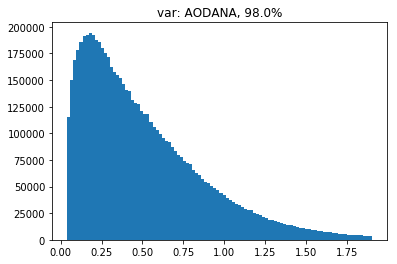

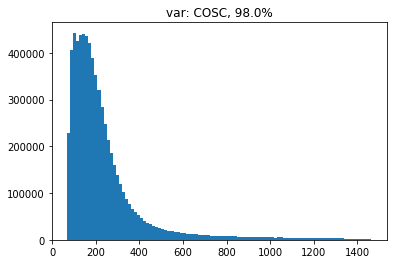

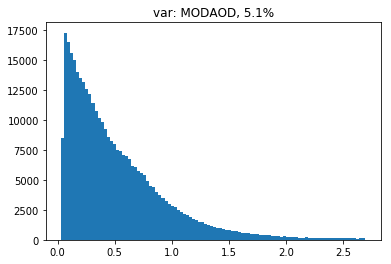

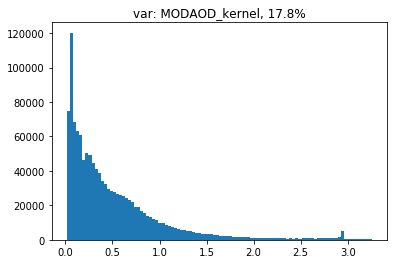

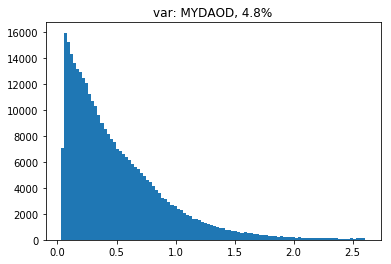

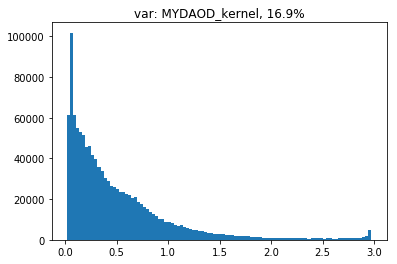

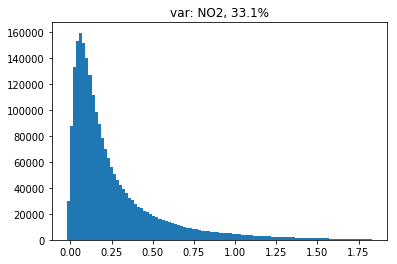

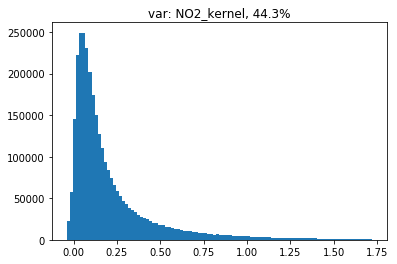

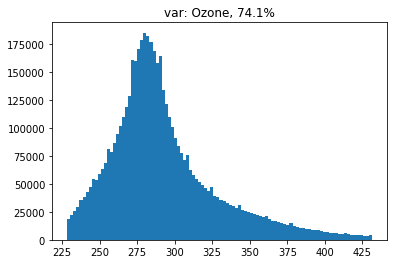

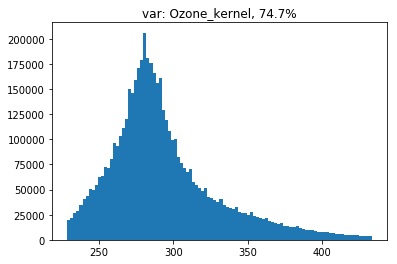

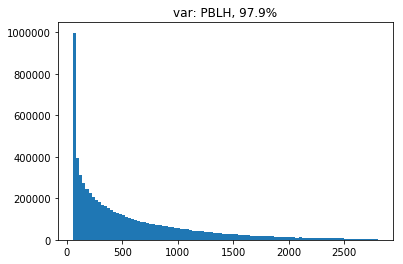

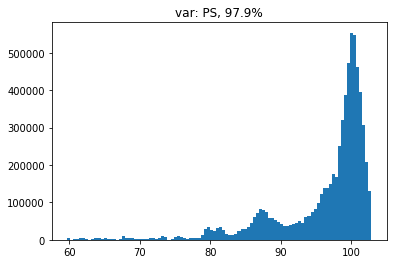

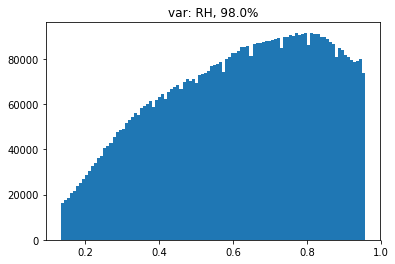

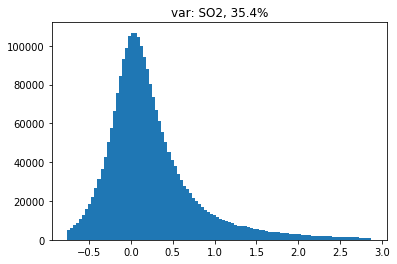

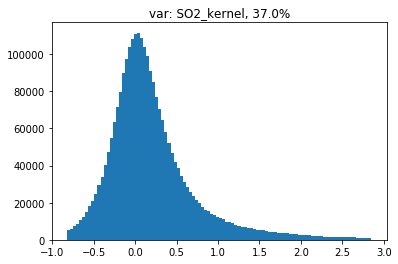

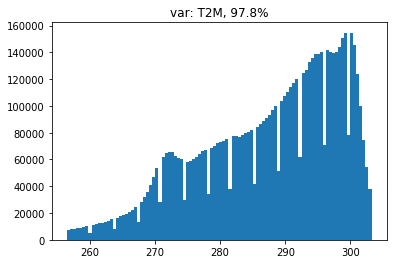

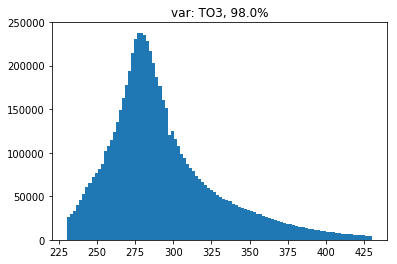

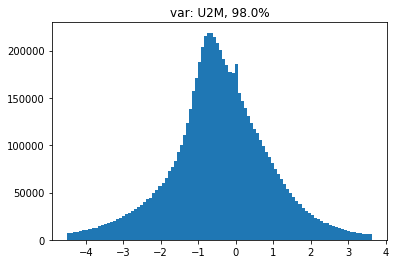

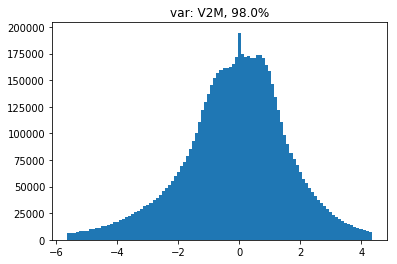

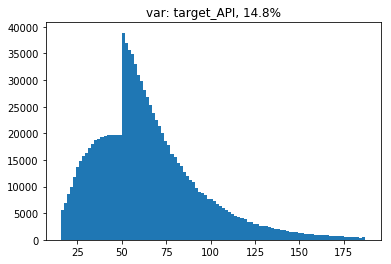

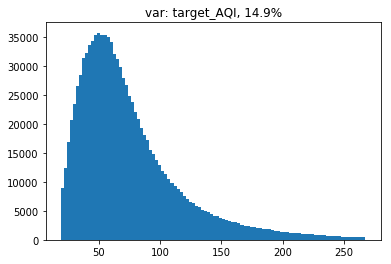

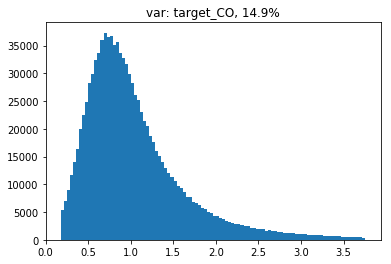

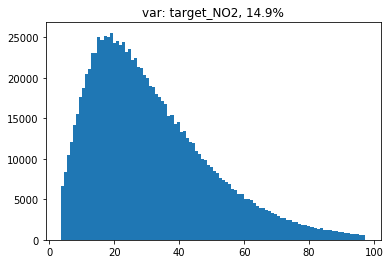

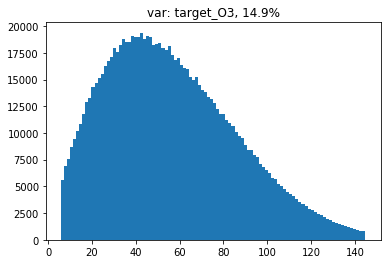

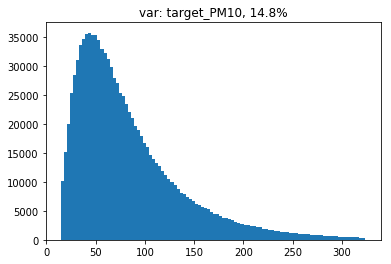

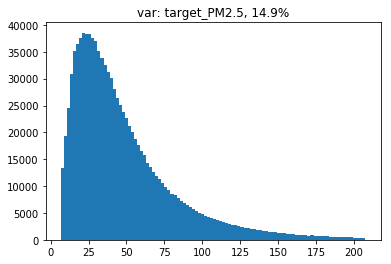

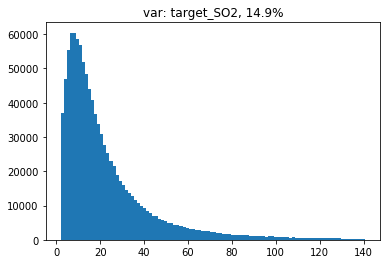

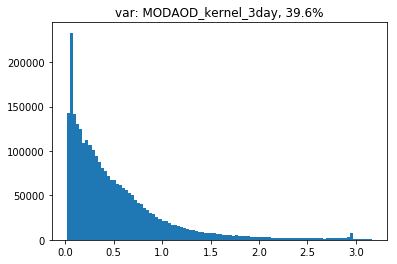

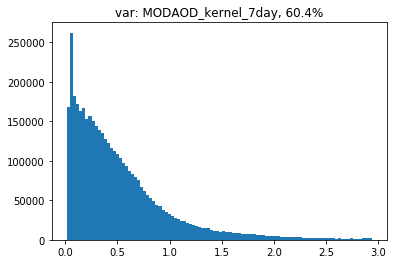

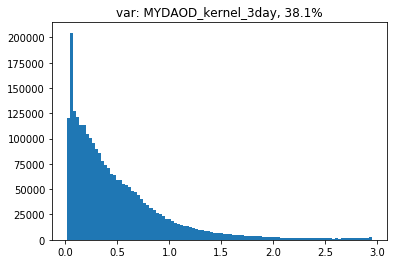

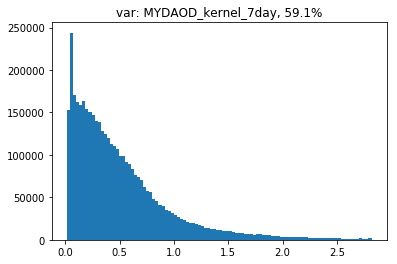

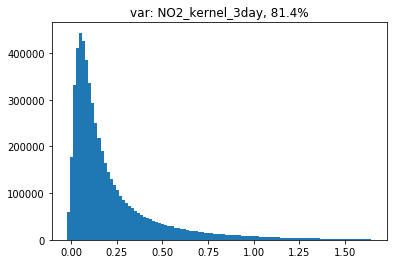

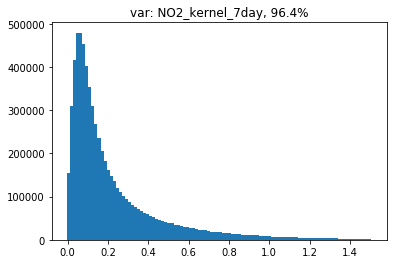

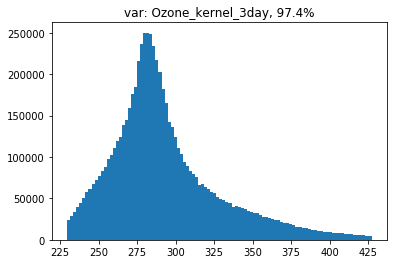

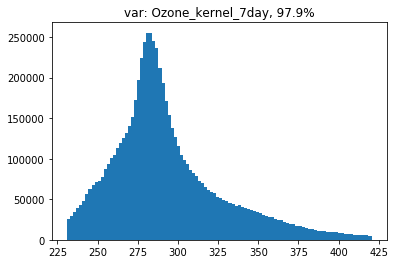

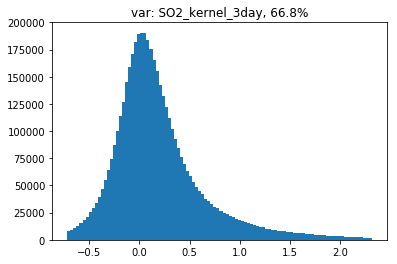

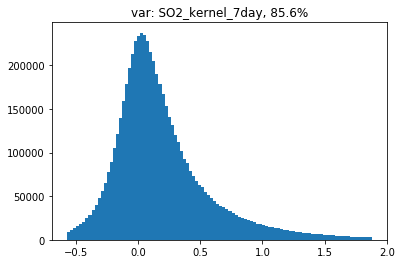

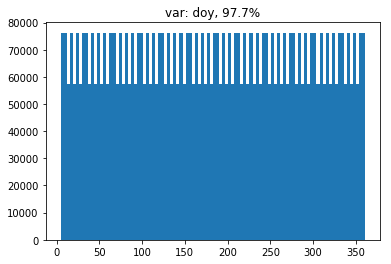

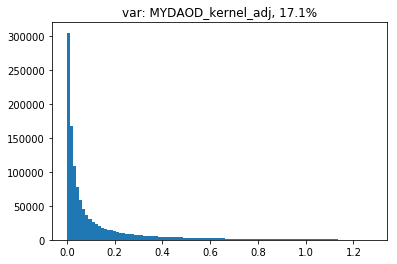

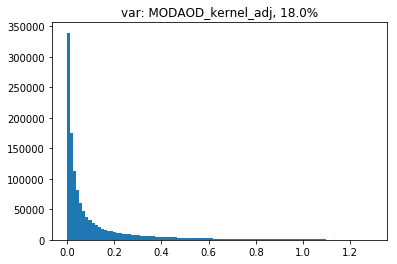

In [17]:
for var in main.columns:
    x = main[var].dropna()
    x = x[(x < x.quantile(0.99)) & (x > x.quantile(0.01))]
    plt.hist(x, bins=100)
    plt.title("var: {}, {:.1f}%".format(var, (x.shape[0] / main.shape[0] * 100)))
    plt.show()

In [18]:
main.dtypes

AODANA                float64
COSC                  float64
MODAOD                float64
MODAOD_kernel         float64
MYDAOD                float64
MYDAOD_kernel         float64
NO2                   float64
NO2_kernel            float64
Ozone                 float64
Ozone_kernel          float64
PBLH                  float64
PS                    float64
RH                    float64
SO2                   float64
SO2_kernel            float64
T2M                   float64
TO3                   float64
U2M                   float64
V2M                   float64
target_API            float64
target_AQI            float64
target_CO             float64
target_NO2            float64
target_O3             float64
target_PM10           float64
target_PM2.5          float64
target_SO2            float64
MODAOD_kernel_3day    float64
MODAOD_kernel_7day    float64
MYDAOD_kernel_3day    float64
MYDAOD_kernel_7day    float64
NO2_kernel_3day       float64
NO2_kernel_7day       float64
Ozone_kern

In [19]:
main.loc[(monitors, dates), :].to_csv(os.path.join(main_root, "train_test.csv"))

In [20]:
main.loc[(monitors, slice(None)), ~main.columns.str.startswith('target_')].to_csv(os.path.join(main_root, "pred.csv"))

### Beijing and Shanghai

In [21]:
# bj_monitors = ['1001A', '1002A', '1003A', '1004A', '1005A', '1006A',
#                '1007A', '1008A', '1009A', '1010A', '1011A', '1012A']

In [22]:
# sh_monitors = ['1142A', '1143A', '1144A', '1145A', '1146A',
#                '1147A', '1148A', '1149A', '1150A']

In [23]:
# main.loc[(bj_monitors, slice(None)), :].to_csv(os.path.join(main_root, "bj_pred.csv"))
# main.loc[(sh_monitors, slice(None)), :].to_csv(os.path.join(main_root, "sh_pred.csv"))

## Shandong

In [24]:
sd_monitors = pd.read_csv("../../data/tmp/sd_monitor_ids.txt")

In [44]:
main = pd.read_csv(os.path.join(main_root, "train_test.csv"))

In [45]:
main.set_index(['id', 'date'], inplace=True)

In [27]:
main.loc[(sd_monitors['id'].values, slice(None)), :].to_csv(os.path.join(main_root, "sd_train_test.csv"))

In [3]:
main = pd.read_csv(os.path.join(main_root, "pred.csv"))

In [4]:
main.set_index(['id', 'date'], inplace=True)

In [30]:
main.loc[(sd_monitors['id'].values, slice(None)), ~main.columns.str.startswith('target_')].to_csv(os.path.join(main_root, "sd_pred.csv"))